# Radial Basis Function Networks

     - a radial basis function is only dependent on a distance (might be the origin) or another center
          ==> a distance metric might be the euclidiena distance
     
     - radial basis function networks:
          - 
     
     RBF networks are useful for:
          - a low dimensional data   
          - datasets with clustered structure


# K - nearest Neighbor Classifier

- non-parametric
- supervised learning algorithm

- used for classification. the outpur of the knn-algorihtm for a given data point is a class membership

- the elctorial committee : the k nearest neighbors


# Kernel Density Estimation via the Parzen-Roseblatt window method

     - a non parametric approach to estimate a probability function for a point , that does not rewuire any assumption about the underlying distribution or knowledge

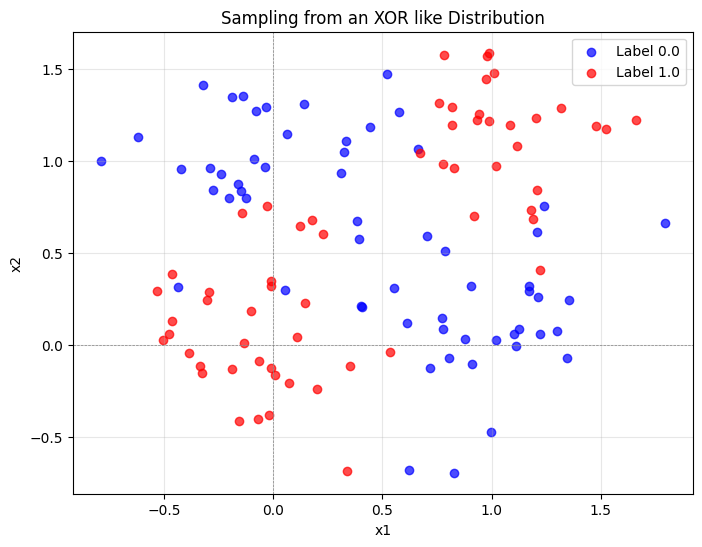

In [1]:
# construct data
import numpy as np
import matplotlib.pyplot as plt


"""
     What is a Multivariate normal distribution:

     I is the Identity matrix sclaed by sigma ^ 2 the 

     the length of the vector is the dimensionality of the distribution.

"""
mu1 = np.array([0, 1])
mu2 = np.array([1, 0])
mu3 = np.array([0, 0])
mu4 = np.array([1, 1])

sigma2 = 0.1  

cov = sigma2 * np.eye(2) 


# p(x | y = 0)

def sample_mixture_gaussian(num_samples : int, mean_vector1 : np.ndarray, mean_vector2: np.ndarray , mean_vector3: np.ndarray, mean_vector4: np.ndarray, cov_matrix : np.ndarray) -> np.ndarray:
     data = []

     for x in range(num_samples):
          if np.random.rand() > 0.5:
               arr = np.random.multivariate_normal(mean_vector1, cov_matrix)
               data.append(np.append(arr, 0.0).tolist())
          else:
               arr = np.random.multivariate_normal(mean_vector2, cov_matrix)
               data.append(np.append(arr, 0.0).tolist())
     
     for x in range(num_samples):
          if np.random.rand() > 0.5:
               arr = np.random.multivariate_normal(mean_vector3, cov_matrix)
               data.append(np.append(arr, 1.0).tolist())
          else:
               arr = np.random.multivariate_normal(mean_vector4, cov_matrix)
               data.append(np.append(arr, 1.0).tolist())
     
     return data
     

# p(x | y = 0)
# p(x | y = 1)
data = sample_mixture_gaussian(60, mu1, mu2, mu3, mu4, cov)

#print(data)

def vizualize_scatterplot(data):
     data = np.array(data)

     class_0 = data[data[:, 2] == 0.0] 
     class_1 = data[data[:, 2] == 1.0]  

     # Create scatterplot
     plt.figure(figsize=(8, 6))
     plt.scatter(class_0[:, 0], class_0[:, 1], c='blue', label='Label 0.0', alpha=0.7)
     plt.scatter(class_1[:, 0], class_1[:, 1], c='red', label='Label 1.0', alpha=0.7)
     plt.title('Sampling from an XOR like Distribution')
     plt.xlabel('x1')
     plt.ylabel('x2')
     plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
     plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
     plt.legend()
     plt.grid(alpha=0.3)

     # Show the plot
     plt.show()

vizualize_scatterplot(data)

In [2]:

import math

class KNNClassifier:

     def __init__(self, training_data : list[list[float]]):
          self.training_data : list[list[float]] = training_data
     

     def _euclidian_distance(self, query_point : list[float], data_point_dimensions: list[float] ) -> float:
          dis = 0
          for x in range(len(query_point)):
               dis += (query_point[x] - data_point_dimensions[x]) ** 2
          
          return math.sqrt(dis)
     
     def _gaussian_window_function(self,  query_point : list[float], data_point_dimensions: list[float], kernel_width : float ) -> float:
          return math.exp( - self._euclidian_distance(query_point=query_point, data_point_dimensions=data_point_dimensions) / (2 * kernel_width))

     # gives back the class
     def _majority_voting(self , k_data_points:  list[list[float]]) -> float:
          one = 0
          zero = 0
          for x in range(len(k_data_points)):
               if k_data_points[x][1] == 1.0:
                    one += 1
               else:
                    zero += 1
          
          return 1.0 if one > zero else 0.0
     
     def classify_set_parzen_window(self, points : list[list[float]], kernel_width :float) -> list[float]:
          classified_test_set = []
          for x in points:
               new_point = []
               new_point.extend(x)
               label = self._classify_point_parzen_window(x, kernel_width)
               new_point.append(label)
               classified_test_set.append(new_point)
          #print(classified_test_set)
          return classified_test_set
     
     def _classify_point_parzen_window(self , query_point : list[float], kernel_width : float) -> float:
          points_class_1 = []
          points_class_2 = []
          for x in range(len(self.training_data)):
               g_window = self._gaussian_window_function(query_point=query_point, data_point_dimensions=self.training_data[x][0:2], kernel_width=kernel_width)
               if self.training_data[x][-1] > 0.5:
                    points_class_1.append(g_window)
               else:
                    points_class_2.append(g_window)
          
          return 1.0 if sum(points_class_1) > sum(points_class_2) else 0.0

               
     def _classify_one_point_knn(self, query_point : list[float], k : int) -> float:
          # [distance, class] 
          knn_distances = []
          for x in range(len(self.training_data)):
               distance = self._euclidian_distance(query_point=query_point, data_point_dimensions=self.training_data[x][0:2])
               label = self.training_data[x][-1]
               knn_distances.append([distance, label])
          #print(knn_distances)
          
          sorted_distances = sorted(knn_distances, key=lambda x: x[0])
          #print(sorted_distances)

          k_sorted = sorted_distances[0: k]
          return self._majority_voting(k_sorted)
     
     def classify_set_knn(self, points : list[list[float]], k : int) -> list[float]:
          classified_test_set = []
          for x in points:
               new_point = []
               new_point.extend(x)
               label = self._classify_one_point_knn(x, k)
               new_point.append(label)
               classified_test_set.append(new_point)

          return classified_test_set



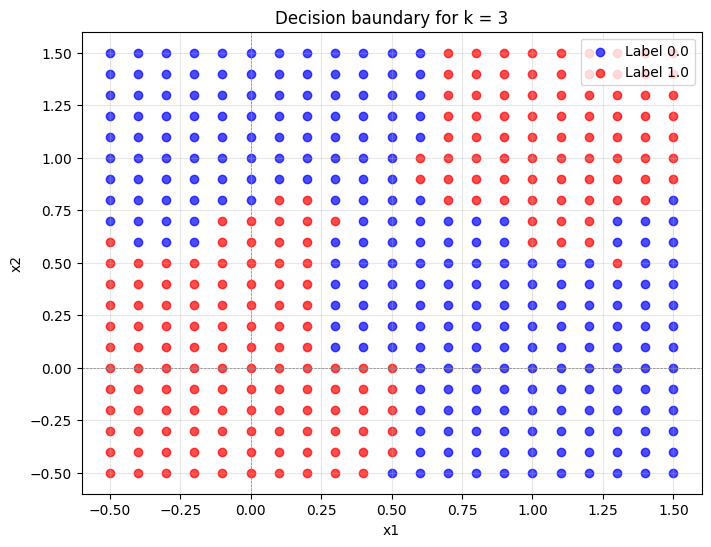

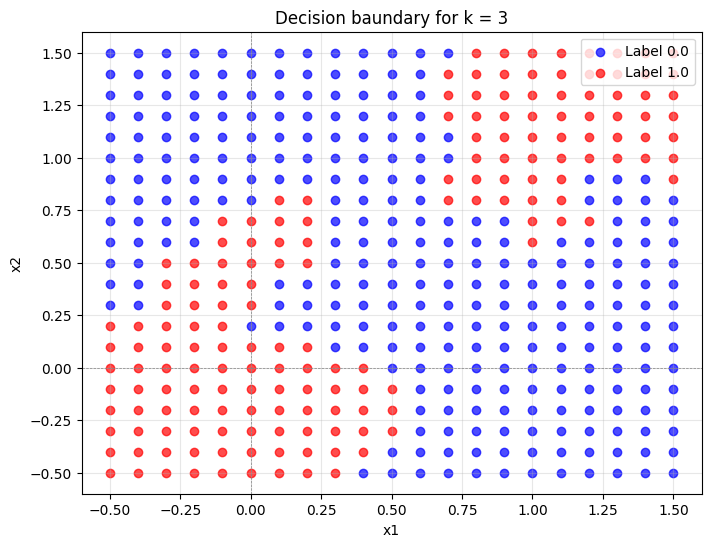

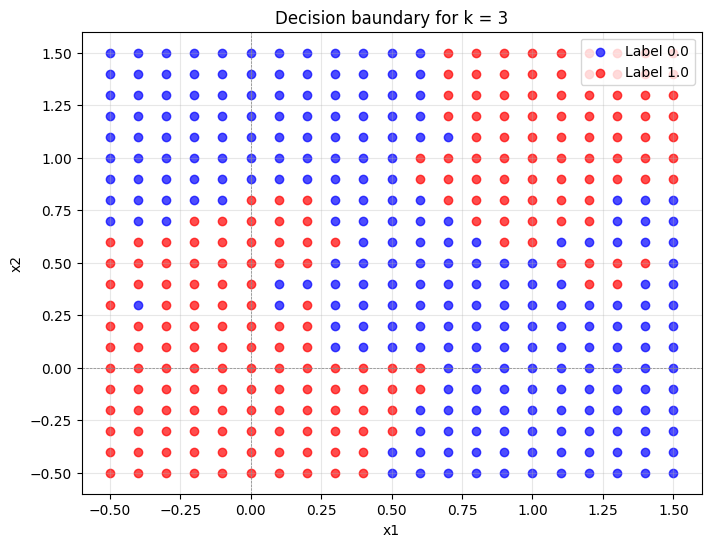

In [23]:

def generate_test_data(x_start, x_end, y_start, y_end, distance) -> list[list[float]]:
     x = np.arange(x_start, x_end + distance, distance)
     y = np.arange(y_start, y_end + distance, distance)

     X, Y = np.meshgrid(x, y)

     return [[float(X[i, j]), float(Y[i, j])] for j in range(len(x)) for i in range(len(y))]

test_set = generate_test_data(-0.5, 1.5, -0.5, 1.5, 0.1)



classifier = KNNClassifier(data)
test_set_classified_3 = classifier.classify_set_knn(test_set, 3)
test_set_classified_1 = classifier.classify_set_knn(test_set, 1)
test_set_classified_2 = classifier.classify_set_knn(test_set, 2)




def vizualize_test_scatter(test_set_classified, headline : str):
     test_data = np.array(test_set_classified)

     class_0 = test_data[test_data[:, 2] == 0.0] 
     class_1 = test_data[test_data[:, 2] == 1.0]  

     # Create scatterplot
     plt.figure(figsize=(8, 6))
     plt.scatter(class_0[:, 0], class_0[:, 1], c='blue', label='Label 0.0', alpha=0.7)
     plt.scatter(class_1[:, 0], class_1[:, 1], c='red', label='Label 1.0', alpha=0.7)
     plt.title(headline)
     plt.xlabel('x1')
     plt.ylabel('x2')
     plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
     plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
     plt.legend()
     plt.grid(alpha=0.3)

     # Show the plot
     plt.show()

vizualize_test_scatter(test_set_classified_3, "Decision baundary for k = 3")

vizualize_test_scatter(test_set_classified_2, "Decision baundary for k = 3")
vizualize_test_scatter(test_set_classified_1, "Decision baundary for k = 3")


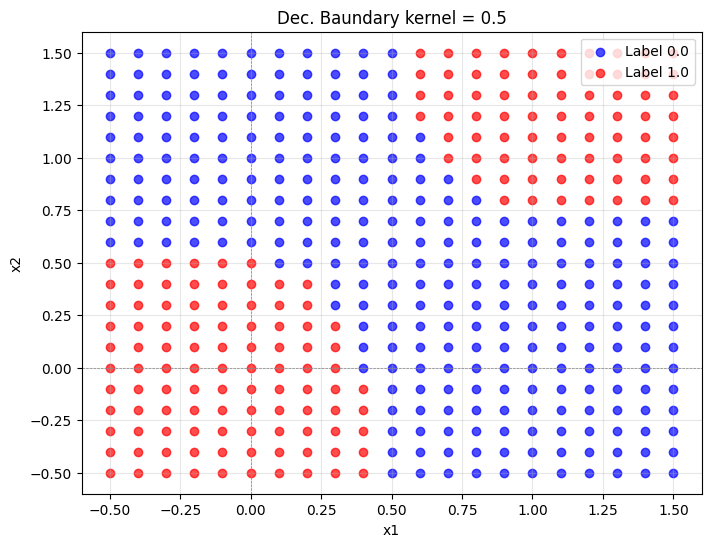

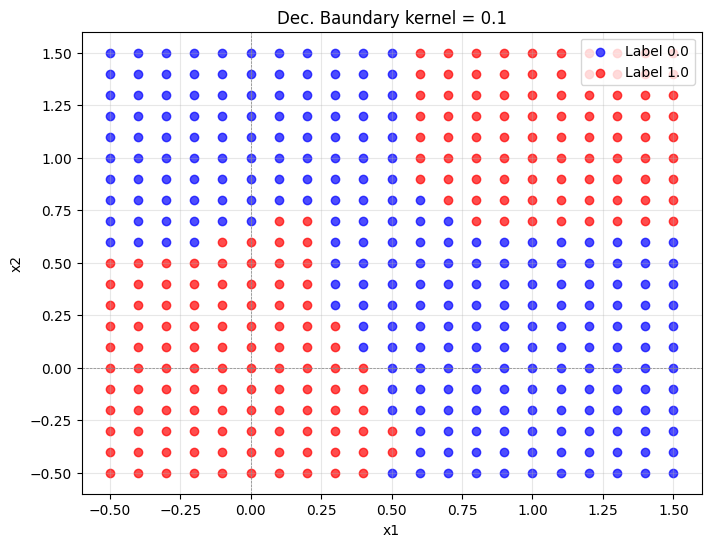

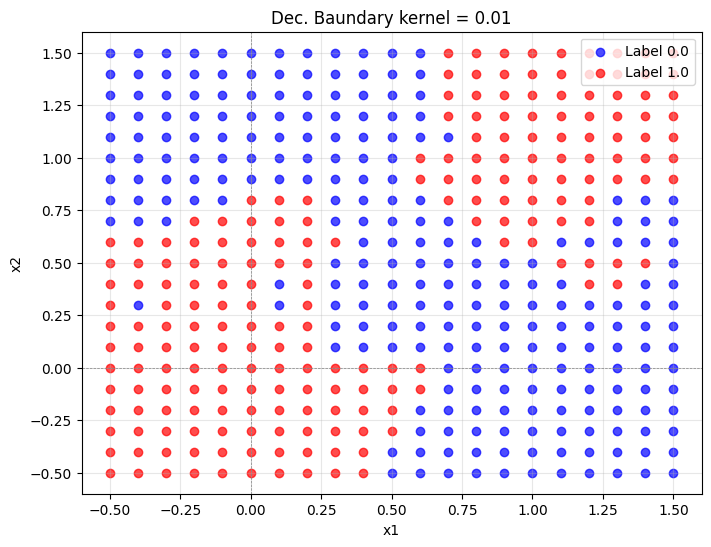

In [4]:
test_set_classified_05 =classifier.classify_set_parzen_window(test_set, 0.5 )
test_set_classified_01 =classifier.classify_set_parzen_window(test_set, 0.1 )
test_set_classified_001 = classifier.classify_set_parzen_window(test_set, 0.01 )

vizualize_test_scatter(test_set_classified=test_set_classified_05, headline="Dec. Baundary kernel = 0.5")
vizualize_test_scatter(test_set_classified=test_set_classified_01, headline="Dec. Baundary kernel = 0.1")
vizualize_test_scatter(test_set_classified=test_set_classified_001, headline="Dec. Baundary kernel = 0.01")


In [5]:
# K - means clustering algorithm for

class KMeansClustering:

     def __init__(self, data):
          self.data = data
     
     def cluster(self, K : int) -> list[float]:
          pass




In [8]:
from sklearn.cluster import KMeans


kmeans_4 = KMeans(n_clusters=4)
kmeans_3 = KMeans(n_clusters=3)
kmeans_2 = KMeans(n_clusters=2)


# Fit the model to the data
arr = np.array(data)
#print(arr[:, :2])
kmeans_4.fit(arr[:, :2])
kmeans_3.fit(arr[:, :2])
kmeans_2.fit(arr[:, :2])

centroids_4 = kmeans_4.cluster_centers_
centroids_3 = kmeans_3.cluster_centers_
centroids_2 = kmeans_2.cluster_centers_

print("Centroids 4")
print(centroids_4)

print("Centroids 3")
print(centroids_3)

print("Centroids 2")
print(centroids_2)

Centroids 4
[[ 0.95374636  0.06306949]
 [ 1.03620946  1.13438099]
 [-0.04741973  0.97203838]
 [-0.1032896   0.0113204 ]]
Centroids 3
[[-0.13784579  0.73392098]
 [ 1.03039557  1.003037  ]
 [ 0.49628909 -0.09028972]]
Centroids 2
[[-0.02359622  0.4016782 ]
 [ 1.01489163  0.75283761]]


In [27]:
# RBF function networks

"""
     This should create a Radial basis function network for two dimensional data.

     Parameters:
          - It will be given a list of centroids (coming from the K-Means clustering)
          - a list of kernel widhts (in this case two kernel widths in terms of sigma_k)
     
     Constructor:
          - centroids
          - theta (the transformed feature space using the kernel functions)
          - the weights

"""


class RBFFunctionNetworks:

     def __init__(self, centroids : list[list[float]], data : np.ndarray, list_kernels : list[float]):
          self.kernels = list_kernels
          self.data = data
          self.input_features : np.ndarray =  self.get_input_features()
          self.centroids = centroids
          self.label_matrix = self.get_label_matrix()

          assert len(self.kernels) == len(centroids)

          self.label_matrix : np.ndarray = self.get_label_matrix()
          self.theta  : np.ndarray = self.init_thetha()
          self.weights : np.ndarray = self.init_weights()
     

     def get_label_matrix(self):
          return self.data[:, 2]

     def get_input_features(self):
          return self.data[:, :2]
     
     def _euclidian_distance(self, query_point : list[float], data_point_dimensions: list[float] ) -> float:
          dis = 0
          for x in range(len(query_point)):
               dis += (query_point[x] - data_point_dimensions[x]) ** 2
          
          return math.sqrt(dis)

     def _gaussian_window_function(self, query_point : list[float],  data_point_dimensions: list[float], kernel_width : float ) -> float:
          return math.exp( - self._euclidian_distance(query_point=query_point, data_point_dimensions=data_point_dimensions) / (2 * kernel_width))


     """
          The output array should have the dimensions len(self.kernels) + 1 , len(data)
     """
     def init_thetha(self) -> np.ndarray:
          transformations = []

          for data_point in self.input_features:
               # adding the bias here
               x_th_transformation = [1]
               for x in range(len(self.kernels)):
                    x_th_transformation.append(self._gaussian_window_function(query_point=data_point, data_point_dimensions=self.centroids[x], kernel_width=self.kernels[x]))
               
               transformations.append(x_th_transformation)
          
          np_arr =  np.array(transformations)
          #print(np_arr)
          print(np_arr.T.shape)
          return np_arr.T


     """
          There should be as many weights as there are
     """
     def init_weights(self):

          gram_matrix = np.dot(self.theta, self.theta.T)
          gram_matrix_inverted = np.linalg.inv(gram_matrix)

          weights = np.dot(np.dot(gram_matrix_inverted, self.theta), self.label_matrix)
          print(weights.shape)
          return weights

     def step(self, input : float) -> float:
          return 1 if input >= 0.5 else 0
          

     def predict_class(self, test_data_point : list[float]) -> float:
          kernel_transformations = [1]
          for x in range(len(self.kernels)):
               kernel_transformations.append(self._gaussian_window_function(query_point= test_data_point, data_point_dimensions=self.centroids[x], kernel_width=self.kernels[x] ))

          return 1.0 if self.step(np.dot(self.weights, np.array(kernel_transformations))) >= 0.5 else 0.0

     """
          Here we are going to do it with a numpy meshgrid
     """
     def predict_dataset(self, test_data : list[list[float]]) -> list[float]:
          lables = []
          for data_point in test_data:
               lables.append(self.predict_class(test_data_point=data_point))
          
          return lables


     


(5, 120)
(5,)
(4, 120)
(4,)
(3, 120)
(3,)


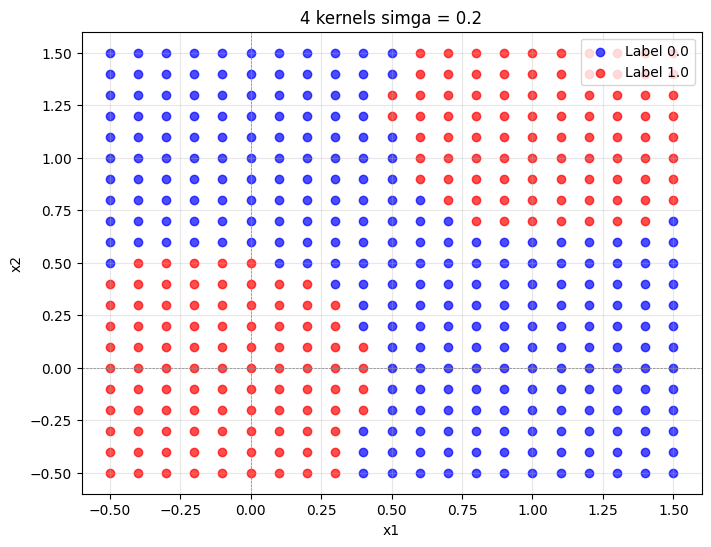

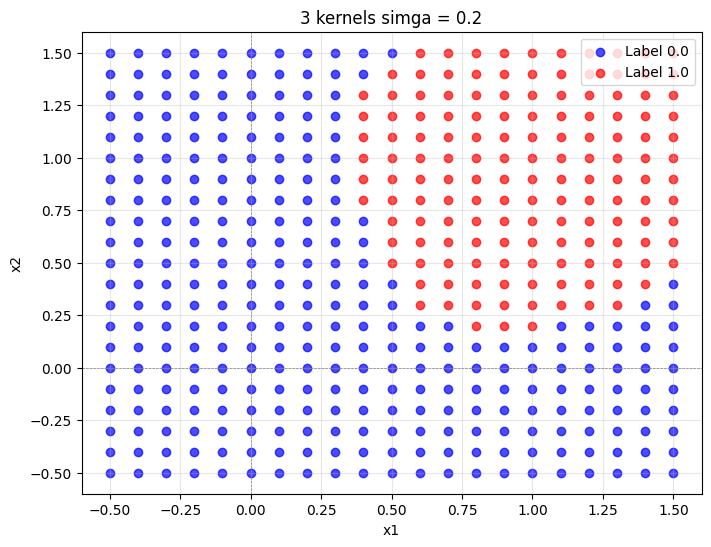

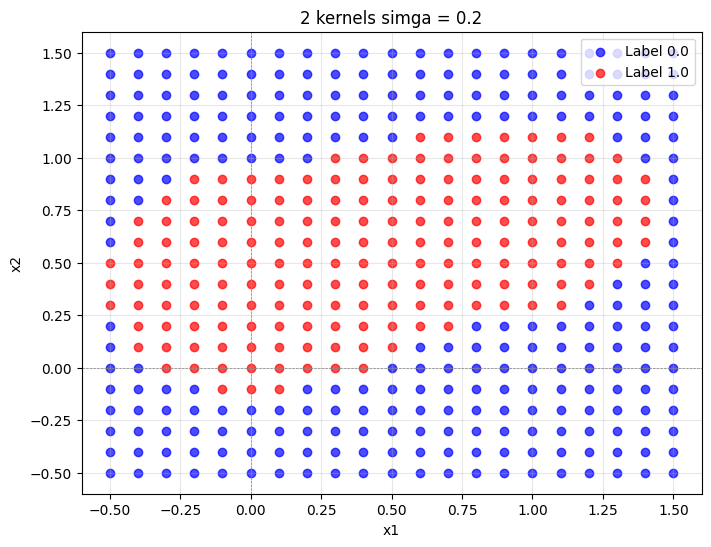

In [30]:
rbf_4 = RBFFunctionNetworks(centroids=centroids_4, data=np.array(data) , list_kernels=[0.2, 0.2, 0.2, 0.2])
rbf_3 = RBFFunctionNetworks(centroids=centroids_3, data=np.array(data) , list_kernels=[0.2, 0.2, 0.2])
rbf_2 = RBFFunctionNetworks(centroids=centroids_2, data=np.array(data) , list_kernels=[0.2, 0.2])


lables_4 = rbf_4.predict_dataset(test_data=test_set)
lables_3 = rbf_3.predict_dataset(test_data=test_set)
lables_2 = rbf_2.predict_dataset(test_data=test_set)


result_4 = np.c_[test_set, lables_4]
result_3 = np.c_[test_set, lables_3]
result_2 = np.c_[test_set, lables_2]
vizualize_test_scatter(test_set_classified=result_4, headline="4 kernels simga = 0.2")
vizualize_test_scatter(test_set_classified=result_3, headline="3 kernels simga = 0.2")
vizualize_test_scatter(test_set_classified=result_2, headline="2 kernels simga = 0.2")



